In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
import matplotlib.pyplot as plt

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

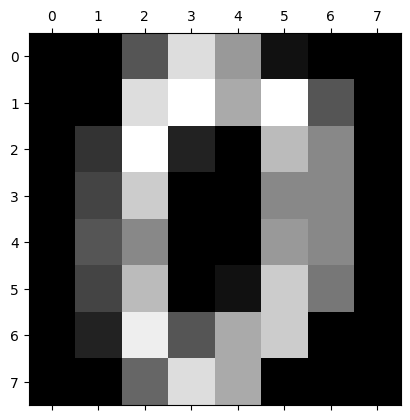

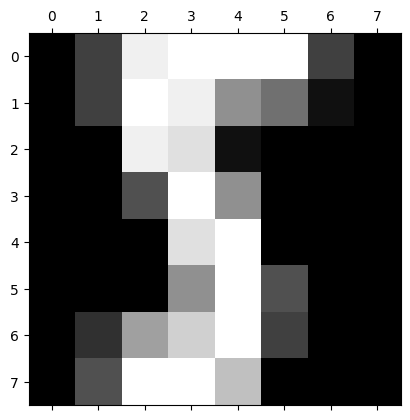

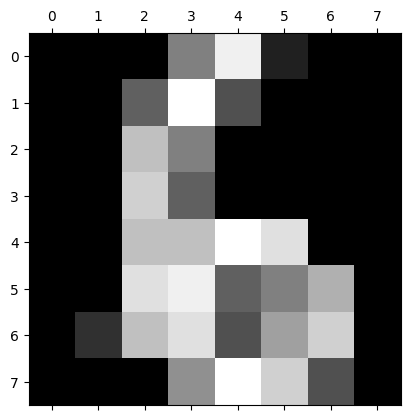

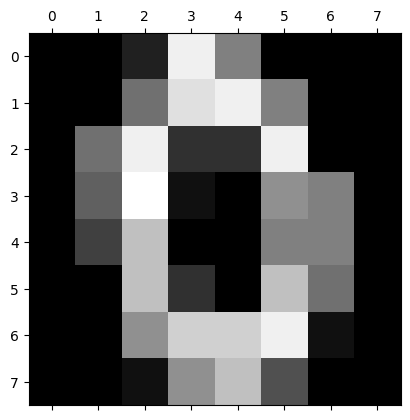

In [5]:
i = 0
for _ in range(4):
    plt.matshow(digits.images[i], cmap="grey")
    i += 145
    plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [15]:
clf = GridSearchCV(RandomForestClassifier(), {
    "n_estimators": [10, 15, 30, 50],
    "criterion": ["gini", "entropy"]
}, cv=5, return_train_score=False)

In [16]:
clf.fit(digits.data, digits.target)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118492,0.027487,0.008633,0.003828,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.886111,0.858333,0.927577,0.935933,0.888579,0.899307,0.028666,8
1,0.164057,0.019675,0.006875,0.001859,gini,15,"{'criterion': 'gini', 'n_estimators': 15}",0.922222,0.897222,0.933148,0.947075,0.896936,0.919321,0.019796,6
2,0.261953,0.017082,0.012975,0.005383,gini,30,"{'criterion': 'gini', 'n_estimators': 30}",0.925000,0.875000,0.958217,0.955432,0.905292,0.923788,0.031339,4
3,0.523985,0.080912,0.018661,0.002788,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.919444,0.883333,0.963788,0.955432,0.902507,0.924901,0.030671,3
4,0.105895,0.009204,0.005357,0.004060,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.902778,0.875000,0.938719,0.944290,0.877437,0.907645,0.029361,7
5,0.191705,0.017301,0.008409,0.002683,entropy,15,"{'criterion': 'entropy', 'n_estimators': 15}",0.919444,0.872222,0.949861,0.941504,0.919220,0.920450,0.026969,5
6,0.340712,0.037892,0.012322,0.003342,entropy,30,"{'criterion': 'entropy', 'n_estimators': 30}",0.933333,0.919444,0.955432,0.958217,0.933148,0.939915,0.014723,2
7,0.704929,0.136666,0.021578,0.009390,entropy,50,"{'criterion': 'entropy', 'n_estimators': 50}",0.936111,0.911111,0.961003,0.972145,0.924791,0.941032,0.022584,1


In [18]:
model = {
    "RandomForestClassifier": {
        "model_name": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 20, 30, 50],
            "criterion": ["gini", "entropy"]
        }
    },
    "logistic regression": {
        "model_name": LogisticRegression(),
        "params": {
            'C': [1, 5, 50],
            'max_iter': [1000, 5000, 10000],
        }
        
    },
    "MultinomialNB": {
        "model_name": MultinomialNB(),
        "params": {
            'alpha': [0.1, 0.5, 1.0, 10.0],
            'fit_prior': [True, False]
            
        }
        
    },
    "GuassianNB": {
        "model_name": GaussianNB(),
        "params": {
            'var_smoothing': [1e-11, 1e-10, 1e-9]
        }
    },
    "Ztrees": {
        "model_name": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"]
        }
    },
    "SVM": {
        "model_name": SVC(),
        "params": {
            "C": [0.1, 0.5, 5, 10]
        }
    }
}

In [19]:
scores = []
for models, mp in model.items():
    clf = GridSearchCV(mp["model_name"], mp["params"], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append([models, clf.best_score_, clf.best_params_])
    

In [20]:
df = pd.DataFrame(scores, columns=("model", "best_score", "best_param"))
df

,model,best_score,best_param
0,RandomForestClassifier,0.937140,"{'criterion': 'gini', 'n_estimators': 50}"
1,logistic regression,0.914878,"{'C': 1, 'max_iter': 1000}"
2,MultinomialNB,0.874246,"{'alpha': 10.0, 'fit_prior': True}"
3,GuassianNB,0.806928,{'var_smoothing': 1e-09}
4,Ztrees,0.808606,{'criterion': 'entropy'}
5,SVM,0.973850,{'C': 5}
